# Analyse de Corrélation Canonique 

Pour commencer, importer Pandas, Matplotlib, numpy et Seaborn.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Charger Palmer Penguin datasets et supprimer les données avec des valeurs manquantes.

Documentation : https://allisonhorst.github.io/palmerpenguins/

In [16]:
link2data = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(link2data)

In [17]:
df.dropna(inplace=True)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [18]:
#code={'Adelie':0,'Chinstrap':1,'Gentoo':2}
#df['species']=df['species'].map(code)
y=df['species'].factorize()[0]
df
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

Étant donné que l'analyse de corrélation canonique implique deux ensembles de données, diviser les données en deux sous-ensembles X et Y. Le sous-ensemble de données X comporte deux variables correspondant à la longueur et la profondeur du bec. Le deuxième sous-ensemble de données Y contient la longueur des nageoires et le poids du corps.

In [19]:
df['flipper_length_mm']=df['flipper_length_mm'].astype(float)
X=df[['bill_length_mm','bill_depth_mm']]
Y=df[['flipper_length_mm','body_mass_g']]


In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

Normaliser les deux sous-ensembles X et Y

In [21]:
X=scaler.fit_transform(X)
Y=scaler.fit_transform(Y)

In [8]:
Y[Y==np.nan]
X[X==np.nan]

array([], dtype=float64)

Nous avons maintenant deux ensembles de données provenant des mêmes pingouins. Comme nous le savons, les caractéristiques d'un pingouin diffèrent fortement d'un autre en fonction de son espèce. Et dans notre exemple, l'espèce est une variable latente qui est commune aux deux ensembles de données X et Y.

Pour effectuer une ACC en Python, nous utiliserons le module CCA de sklearn.cross_decomposition.

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.CCA.html

Importer le module CCA

In [22]:
from sklearn.cross_decomposition import CCA

Instancier un objet CCA et utiliser les fonctions fit() et transform() avec les deux matrices standardisées pour effectuer l'ACC.

In [23]:
my_cca=CCA().fit(X,Y)
X_c,Y_c=my_cca.transform(X,Y)



Affiche la taille des deux matrices de corrélation canonique.

In [11]:
X_c.shape
Y_c.shape

(333, 2)

Creusons davantage pour comprendre les résultats de l'analyse de corrélation canonique et en avoir une intuition. Dans un premier temps, nous allons utiliser la paire de covariables canoniques et voir comment elles sont corrélées entre elles.

Combiner les résultats de l'ACC avec les métadonnées (Species,Island,sex) correspondant aux données des pingouins en utilisant Pandas.

In [24]:
combined=df[['species','island','sex']]
combined['Xc0']=X_c[:,0]
combined['Xc1']=X_c[:,1]
combined['Yc0']=Y_c[:,0]
combined['Yc1']=Y_c[:,1]
combined

/tmp/ipykernel_3579/1041402290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['Xc0']=X_c[:,0]
/tmp/ipykernel_3579/1041402290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['Xc1']=X_c[:,1]
/tmp/ipykernel_3579/1041402290.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

,species,island,sex,Xc0,Xc1,Yc0,Yc1
0,Adelie,Torgersen,MALE,-1.186252,-0.010367,-1.408795,0.682866
1,Adelie,Torgersen,FEMALE,-0.709573,-0.456036,-1.053857,0.429879
2,Adelie,Torgersen,FEMALE,-0.790732,-0.130809,-0.393550,-0.839620
4,Adelie,Torgersen,FEMALE,-1.718663,-0.073623,-0.542888,-0.458571
5,Adelie,Torgersen,MALE,-1.772295,0.736248,-0.763548,-0.014204
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,FEMALE,1.572414,-0.927902,0.905520,0.088041
340,Gentoo,Biscoe,FEMALE,1.322035,-0.748356,0.979352,-0.070682
341,Gentoo,Biscoe,MALE,1.377092,0.220933,1.448490,0.630948
342,Gentoo,Biscoe,FEMALE,0.934766,-0.752510,0.753673,0.564495


Vérifier la corrélation de la première et deuxième paire de covariables canoniques. Vous pouvez utiliser la fonction corrcoef() de NumPy. 

In [25]:

np.corrcoef(X_c[:,0],Y_c[:,0])

array([[1.        , 0.78763151],
       [0.78763151, 1.        ]])

Commenter les résultats.

On voit qu'elles sont fortement corrélées

Pour mieux comprendre la relation entre les paires de covariables canoniques, visualiser les données dans le plan constitué de la premiere paire de covariables canoniques.

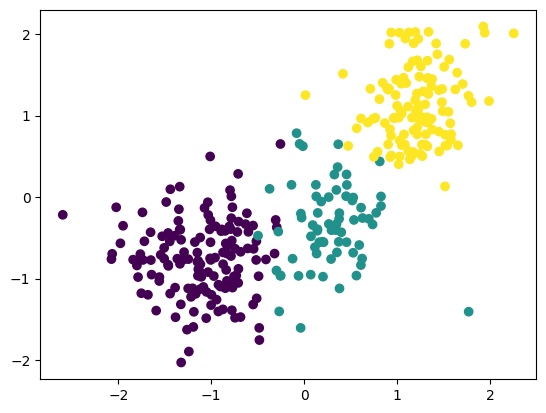

In [26]:
plt.scatter(X_c[:,0],Y_c[:,0],c=y)

Commenter la visualisation.

On a visualiser les données dans un plan où elles sont le plus corrélées.

Pour ce jeux de données, nous savons déjà que la variable d'espèce dans l'ensemble de données est une variable latente ou une variable cachée. Voyons comment la variable latente est corrélée avec la première paire de covariables canoniques. 

Réaliser un boxplot entre la variable latente et chacune des covariables canoniques de la première paire.

Documentation : https://fr.wikipedia.org/wiki/Bo%C3%AEte_%C3%A0_moustaches et https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot: xlabel='Xc0', ylabel='species'>

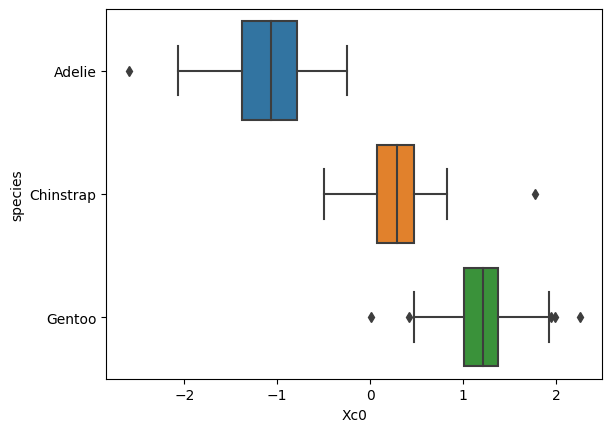

In [27]:
sns.boxplot(data=combined,x='Xc0',y="species")


<AxesSubplot: xlabel='Yc0', ylabel='species'>

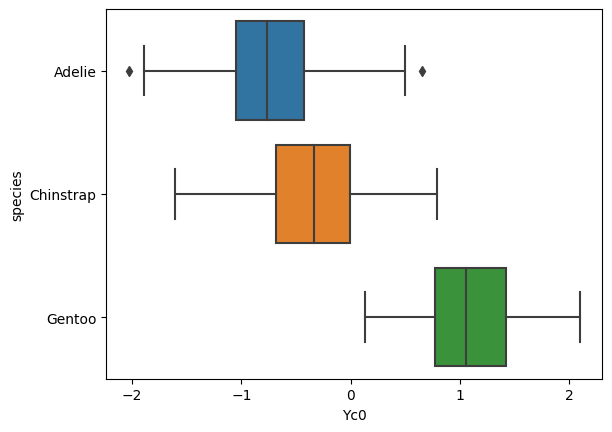

In [21]:
sns.boxplot(data=combined,x='Yc0',y="species")

En colorant les nuages de points dans le plan composé de la première paire de covariables canoniques, commenter comment les covariables canoniques ont capturé la variable latente de nos données.

Commenter la visualisation.

La vari ble espèce est plus corrélée avec la deuxième variable de la première paire de covariables canoniques qu'elle ne l'est avec la première.

Allons un peu plus loin et réalisons une carte thermique des corrélations entre les covariables canoniques de chaque ensemble de données par rapport à notre ensemble de données d'entrée, y compris les métadonnées qui lui sont associées. 


Créer une dataframe avec les données originales et les covariables canoniques du premier ensemble de données X. Pour calculer la corrélation, nous convertissons les variables de caractère en variables catégorielles en codes 0/1/2.

In [28]:
new_combined=combined
new_combined['sex']=df['sex'].factorize()[0]
new_combined['species']=df['species'].factorize()[0]
new_combined['island']=df['island'].factorize()[0]
new_combined[['bill_depth_mm','flipper_length_mm','body_mass_g']]=df[['bill_depth_mm','flipper_length_mm','body_mass_g']]	
new_combined

,species,island,sex,Xc0,Xc1,Yc0,Yc1,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,0,0,-1.186252,-0.010367,-1.408795,0.682866,18.7,181.0,3750.0
1,0,0,1,-0.709573,-0.456036,-1.053857,0.429879,17.4,186.0,3800.0
2,0,0,1,-0.790732,-0.130809,-0.393550,-0.839620,18.0,195.0,3250.0
4,0,0,1,-1.718663,-0.073623,-0.542888,-0.458571,19.3,193.0,3450.0
5,0,0,0,-1.772295,0.736248,-0.763548,-0.014204,20.6,190.0,3650.0
...,...,...,...,...,...,...,...,...,...,...
338,2,1,1,1.572414,-0.927902,0.905520,0.088041,13.7,214.0,4925.0
340,2,1,1,1.322035,-0.748356,0.979352,-0.070682,14.3,215.0,4850.0
341,2,1,0,1.377092,0.220933,1.448490,0.630948,15.7,222.0,5750.0
342,2,1,1,0.934766,-0.752510,0.753673,0.564495,14.8,212.0,5200.0


In [17]:
corr=new_combined.corr()
corr

,species,island,sex,Xc0,Xc1,Yc0,Yc1,bill_depth_mm,flipper_length_mm,body_mass_g
species,1.000000,-0.009176,-0.010964,9.350575e-01,-7.871884e-02,8.504455e-01,2.735874e-02,-0.740346,0.850737,0.750434
island,-0.009176,1.000000,-0.005834,3.866926e-02,3.213875e-01,-1.610705e-01,-1.249848e-01,0.189636,-0.162739,-0.201966
sex,-0.010964,-0.005834,1.000000,-2.538332e-02,-5.767897e-01,-2.495635e-01,-4.180092e-01,-0.372673,-0.255169,-0.424987
Xc0,0.935057,0.038669,-0.025383,1.000000e+00,-4.252560e-16,7.876315e-01,-5.461576e-16,-0.734650,0.787560,0.682351
Xc1,-0.078719,0.321388,-0.576790,-4.252560e-16,1.000000e+00,-1.663021e-07,8.638695e-02,0.678447,0.001163,0.043147
Yc0,0.850446,-0.161070,-0.249564,7.876315e-01,-1.663021e-07,1.000000e+00,-7.370148e-16,-0.578633,0.999909,0.866333
Yc1,0.027359,-0.124985,-0.418009,-5.461576e-16,8.638695e-02,-7.370148e-16,1.000000e+00,0.058609,0.013464,0.499467
bill_depth_mm,-0.740346,0.189636,-0.372673,-7.346495e-01,6.784468e-01,-5.786332e-01,5.860895e-02,1.000000,-0.577792,-0.472016
flipper_length_mm,0.850737,-0.162739,-0.255169,7.875601e-01,1.162924e-03,9.999094e-01,1.346373e-02,-0.577792,1.000000,0.872979
body_mass_g,0.750434,-0.201966,-0.424987,6.823510e-01,4.314731e-02,8.663327e-01,4.994673e-01,-0.472016,0.872979,1.000000


Avec la fonction corr() de Pandas, calculer la corrélation de toutes les variables de la dataframe.

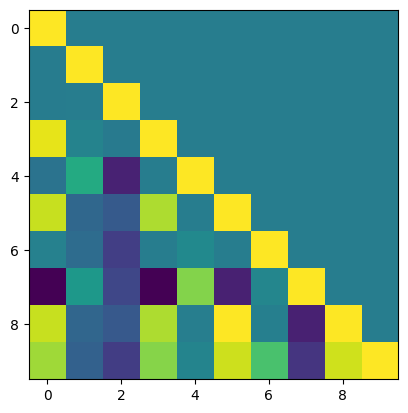

In [33]:
plt.imshow(np.tril(corr))

Créer une carte thermique avec la matrice de corrélation (triangulaire inférieure). 
Pour le faire, utiliser la fonction tril() de Numpy.

In [ ]:
np.tril

Commenter la carte thérmique.

On voit nettement la forte corrélation entre la variable espèce et la première paire de variables canoniques et que par exemple qu'il n'est pas du tout corrélé avec les variables island et sex.

Réalisons une carte thermique de corrélation triangulaire inférieure similaire avec les covariables canoniques de l'ensemble de données Y et l'ensemble de données Y lui-même, y compris les métadonnées qui lui sont associées.

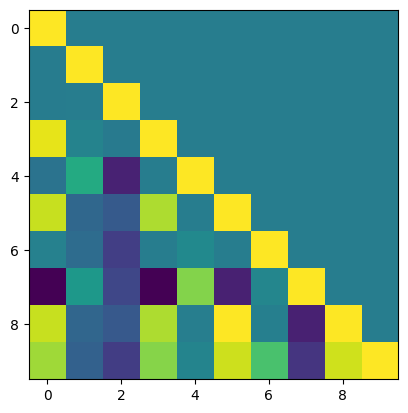

In [31]:
new_combined['Xc1']=X_c[:,1]
new_combined['Yc1']=Y_c[:,1]
plt.imshow(np.tril(new_combined.corr()))

Commenter la carte thérmique.

Les deux cartes thermiques montrant les corrélations entre les covariables canoniques et les ensembles de données montrent que le sexe est une autre variable qui a un effet sur les deux ensembles de données et que l'ACC pourrait en tenir compte. Pour voir l'effet du sexe, nous pouvons visualiser les données dans le plan constitué de la deuxième paire de covariables canoniques et les colorer par variable de sexe.

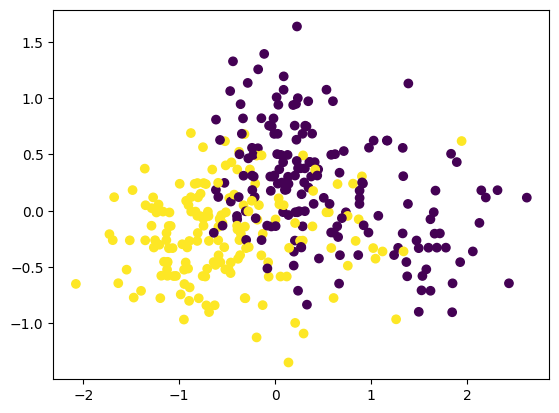

In [11]:
sex=df['sex'].factorize()[0]
plt.scatter(X_c[:,1],Y_c[:,1],c=sex)

On peut voir que le sex est fortement corrélé à la deuxième paire de variables canoniques.